In [ ]:
import tikzplotlib
import pandas as pd
import numpy as np

from pandas_profiling import ProfileReport
from pysurvival.utils.display import correlation_matrix
from matplotlib import pyplot as plt
%pylab inline

plt.style.use('tableau-colorblind10')

/shared-libs/python3.7/py/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Reading the dataset
raw_dataset = pd.read_csv("dataset/ds/user_features.csv", sep="\t")
print("The raw_dataset has the following shape: {}.".format(raw_dataset.shape))
raw_dataset.head(3)

The raw_dataset has the following shape: (100581, 19).


,UserId,CreationDate,CastDownVotes,CastUpVotes,ProfileViews,LastAccessDate,QuestionCount,AnswerCount,CommentCount,AvgQuestionViewCount,AvgQuestionFavouriteCount,AvgQuestionCommentCount,AvgQuestionScore,AvgAnswerScore,AvgAnswerCommentCount,AvgCommentScore,MonthsActive,MonthsSinceLastActivity,MonthsSinceJoined
0,60,2014-05-14 00:56:07,0,0,1,2014-05-14 00:56:07,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,85,85
1,67,2014-05-14 01:29:11,0,0,1,2014-05-14 02:03:08,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,85,85
2,69,2014-05-14 01:40:28,0,1,1,2014-05-14 04:26:39,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,85,85


In [ ]:
raw_dataset.columns

Index(['UserId', 'CreationDate', 'CastDownVotes', 'CastUpVotes',
       'ProfileViews', 'LastAccessDate', 'QuestionCount', 'AnswerCount',
       'CommentCount', 'AvgQuestionViewCount', 'AvgQuestionFavouriteCount',
       'AvgQuestionCommentCount', 'AvgQuestionScore', 'AvgAnswerScore',
       'AvgAnswerCommentCount', 'AvgCommentScore', 'MonthsActive',
       'MonthsSinceLastActivity', 'MonthsSinceJoined'],
      dtype='object')

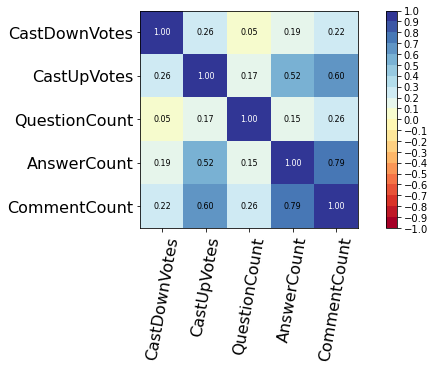

In [ ]:
features = ['CastDownVotes', 'CastUpVotes', 'QuestionCount', 
            'AnswerCount', 'CommentCount']

correlation_matrix(raw_dataset[features], figure_size=(10, 4), text_fontsize=8)

In [ ]:
def f(x):
    if x > 24:
        return 1
    else:
        return 0
    
raw_dataset['disengaged'] = raw_dataset['MonthsSinceLastActivity'].apply(f)

In [ ]:
raw_dataset.head()

,UserId,CreationDate,CastDownVotes,CastUpVotes,ProfileViews,LastAccessDate,QuestionCount,AnswerCount,CommentCount,AvgQuestionViewCount,AvgQuestionFavouriteCount,AvgQuestionCommentCount,AvgQuestionScore,AvgAnswerScore,AvgAnswerCommentCount,AvgCommentScore,MonthsActive,MonthsSinceLastActivity,MonthsSinceJoined,disengaged
0,60,2014-05-14 00:56:07,0,0,1,2014-05-14 00:56:07,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,85,85,1
1,67,2014-05-14 01:29:11,0,0,1,2014-05-14 02:03:08,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,85,85,1
2,69,2014-05-14 01:40:28,0,1,1,2014-05-14 04:26:39,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,85,85,1
3,93,2014-05-14 05:23:16,0,0,2,2014-05-14 05:23:16,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,85,85,1
4,99,2014-05-14 05:44:39,0,0,1,2014-05-14 09:24:43,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,85,85,1


In [ ]:
features = ['CastDownVotes', 'CastUpVotes', 'QuestionCount', 'AnswerCount', 'CommentCount']

time_column = "MonthsActive"
event_column = "disengaged"

raw_dataset_cut = raw_dataset.copy()[features + [time_column, event_column]]
raw_dataset_cut = raw_dataset_cut[((raw_dataset_cut['QuestionCount'] > 0) | \
                                  (raw_dataset_cut['AnswerCount'] > 0) |
                                  (raw_dataset_cut['CommentCount'] > 0) |
                                  (raw_dataset_cut['CastDownVotes'] > 0) |
                                  (raw_dataset_cut['CastUpVotes'] > 0))|
                                  True]

raw_dataset_cut.reset_index(inplace=True)
raw_dataset_cut

,index,CastDownVotes,CastUpVotes,QuestionCount,AnswerCount,CommentCount,MonthsActive,disengaged
0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1
2,2,0,1,0,0,0,0,1
3,3,0,0,0,0,0,0,1
4,4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
100576,100576,717,1983,0,28,91,50,0
100577,100577,0,7,1,1,0,18,0
100578,100578,0,2,0,1,0,28,0
100579,100579,0,0,0,0,0,37,0


In [ ]:
raw_dataset_cut_original = raw_dataset_cut.copy() 
raw_dataset_cut = raw_dataset_cut[features].transform(lambda x: x)#np.log(x+1))
raw_dataset_cut[time_column] = raw_dataset_cut_original[time_column].values
raw_dataset_cut[event_column] = raw_dataset_cut_original[event_column].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from pysurvival.models.simulations import SimulationModel
from pysurvival.models.multi_task import NeuralMultiTaskModel
from pysurvival.utils.metrics import concordance_index
from pysurvival.models.semi_parametric import CoxPHModel
from pysurvival.utils.display import integrated_brier_score
from pysurvival.models.survival_forest import ConditionalSurvivalForestModel
from pysurvival.models.non_parametric import KaplanMeierModel
from pysurvival.utils.display import display_non_parametric
%pylab inline

Populating the interactive namespace from numpy and matplotlib
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
question_dataset = raw_dataset_cut.copy()
answer_dataset = raw_dataset_cut.copy()
comment_dataset = raw_dataset_cut.copy()
upvote_dataset = raw_dataset_cut.copy()
downvote_dataset = raw_dataset_cut.copy()

In [ ]:
question_dataset.sort_values('QuestionCount', ascending=False, inplace=True)
question_dataset.reset_index(inplace=True)

answer_dataset.sort_values('AnswerCount', ascending=False, inplace=True)
answer_dataset.reset_index(inplace=True)

comment_dataset.sort_values('CommentCount', ascending=False, inplace=True)
comment_dataset.reset_index(inplace=True)

upvote_dataset.sort_values('CastUpVotes', ascending=False, inplace=True)
upvote_dataset.reset_index(inplace=True)

downvote_dataset.sort_values('CastDownVotes', ascending=False, inplace=True)
downvote_dataset.reset_index(inplace=True)

In [ ]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

percent = 5

x = math.ceil((question_dataset.shape[0]*percent)/100.0)

top_q = question_dataset.head(x)
bottom_q = question_dataset.tail(x)
T_top_q, T_bottom_q = top_q[time_column], bottom_q[time_column]
E_top_q, E_bottom_q = top_q[event_column], bottom_q[event_column]

top_a = answer_dataset.head(x)
bottom_a = answer_dataset.tail(x)
T_top_a, T_bottom_a = top_a[time_column], bottom_a[time_column]
E_top_a, E_bottom_a = top_a[event_column], bottom_a[event_column]

top_c = comment_dataset.head(x)
bottom_c = comment_dataset.tail(x)
T_top_c, T_bottom_c = top_c[time_column], bottom_c[time_column]
E_top_c, E_bottom_c = top_c[event_column], bottom_c[event_column]

top_uv = upvote_dataset.head(x)
bottom_uv = upvote_dataset.tail(x)
T_top_uv, T_bottom_uv = top_uv[time_column], bottom_uv[time_column]
E_top_uv, E_bottom_uv = top_uv[event_column], bottom_uv[event_column]

top_dv = downvote_dataset.head(x)
bottom_dv = downvote_dataset.tail(x)
T_top_dv, T_bottom_dv = top_dv[time_column], bottom_dv[time_column]
E_top_dv, E_bottom_dv = top_dv[event_column], bottom_dv[event_column]

# User behavioural attributes importance analysis for predicting the probability of disengagement over time  
one_or_more_q = question_dataset[(question_dataset['QuestionCount'] > 0)]
no_q = question_dataset[(question_dataset['QuestionCount'] == 0)]
T_one_or_more_q, T_no_q = one_or_more_q[time_column], no_q[time_column]
E_one_or_more_q, E_no_q = one_or_more_q[event_column], no_q[event_column]

one_or_more_a = answer_dataset[(answer_dataset['AnswerCount'] > 0)]
no_a = answer_dataset[(answer_dataset['AnswerCount'] == 0)]
T_one_or_more_a, T_no_a = one_or_more_a[time_column], no_a[time_column]
E_one_or_more_a, E_no_a = one_or_more_a[event_column], no_a[event_column]

one_or_more_c = comment_dataset[(comment_dataset['CommentCount'] > 0)]
no_c = comment_dataset[(comment_dataset['CommentCount'] == 0)]
T_one_or_more_c, T_no_c = one_or_more_c[time_column], no_c[time_column]
E_one_or_more_c, E_no_c = one_or_more_c[event_column], no_c[event_column]

one_or_more_uv = upvote_dataset[(upvote_dataset['CastUpVotes'] > 0)]
no_uv = upvote_dataset[(upvote_dataset['CastUpVotes'] == 0)]
T_one_or_more_uv, T_no_uv = one_or_more_uv[time_column], no_uv[time_column]
E_one_or_more_uv, E_no_uv = one_or_more_uv[event_column], no_uv[event_column]

one_or_more_dv = downvote_dataset[(downvote_dataset['CastDownVotes'] > 0)]
no_dv = downvote_dataset[(downvote_dataset['CastDownVotes'] == 0)]
T_one_or_more_dv, T_no_dv = one_or_more_dv[time_column], no_dv[time_column]
E_one_or_more_dv, E_no_dv = one_or_more_dv[event_column], no_dv[event_column]

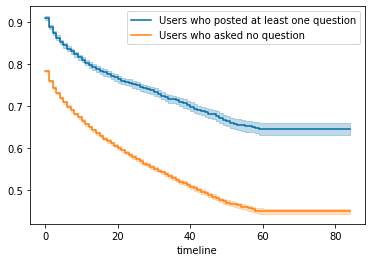

In [ ]:
kmf = KaplanMeierFitter()

ax = plt.subplot(111)
# ax = kmf.fit(T_top_q, E_top_q, label="User with top-{0}% of questions".format(percent)).plot(ax=ax)
# ax = kmf.fit(T_top_a, E_top_a, label="User with top-{0}% of answers".format(percent)).plot(ax=ax)
# ax = kmf.fit(T_top_c, E_top_c, label="User with top-{0}% of comments".format(percent)).plot(ax=ax)
# ax = kmf.fit(T_top_uv, E_top_uv, label="User with top-{0}% of upvotes".format(percent)).plot(ax=ax)
# ax = kmf.fit(T_top_dv, E_top_dv, label="User with top-{0}% of downvotes".format(percent)).plot(ax=ax)

ax = kmf.fit(T_one_or_more_q, E_one_or_more_q, label="Users who posted at least one question".format(percent)).plot(ax=ax)
ax = kmf.fit(T_no_q, E_no_q, label="Users who asked no question".format(percent)).plot(ax=ax)

#ax = kmf.fit(T_one_or_more_a, E_one_or_more_a, label="Users who posted at least one answer".format(percent)).plot(ax=ax)
#ax = kmf.fit(T_no_a, E_no_a, label="Users who answered no question".format(percent)).plot(ax=ax)

#ax = kmf.fit(T_one_or_more_c, E_one_or_more_c, label="Users who posted at least one comment".format(percent)).plot(ax=ax)
#ax = kmf.fit(T_no_c, E_no_c, label="Users who posted no comments".format(percent)).plot(ax=ax)

#ax = kmf.fit(T_one_or_more_uv, E_one_or_more_uv, label="Users who upvoted at least once".format(percent)).plot(ax=ax)
#ax = kmf.fit(T_no_uv, E_no_uv, label="Users who did not upvote".format(percent)).plot(ax=ax)

#ax = kmf.fit(T_one_or_more_dv, E_one_or_more_dv, label="Users who downvoted at least once".format(percent)).plot(ax=ax)
#ax = kmf.fit(T_no_dv, E_no_dv, label="Users who did not downvote".format(percent)).plot(ax=ax)

tikzplotlib.save("figures/tikz/cs/36/survial_curve_questions_36.tikz")

In [ ]:
# logrank_test for questions
results = logrank_test(T_one_or_more_q, T_no_q, 
                       event_observed_A=E_one_or_more_q, event_observed_B=E_no_q)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
        1528.57 <0.005       inf

In [ ]:
# logrank_test for answers
results = logrank_test(T_one_or_more_a, T_no_a, 
                       event_observed_A=E_one_or_more_a, event_observed_B=E_no_a)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
        1300.58 <0.005    943.67

In [ ]:
# logrank_test for comments
results = logrank_test(T_one_or_more_c, T_no_c, 
                       event_observed_A=E_one_or_more_c, event_observed_B=E_no_c)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
        2070.12 <0.005       inf

In [ ]:
# logrank_test for upvotes
results = logrank_test(T_one_or_more_uv, T_no_uv, 
                       event_observed_A=E_one_or_more_uv, event_observed_B=E_no_uv)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
        4897.03 <0.005       inf

In [ ]:
# logrank_test for downvotes
results = logrank_test(T_one_or_more_dv, T_no_dv, 
                       event_observed_A=E_one_or_more_dv, event_observed_B=E_no_dv)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         370.55 <0.005    271.89

In [ ]:
one_or_more_q.shape[0], no_q.shape[0]

(16041, 84540)

In [ ]:
one_or_more_a.shape[0], no_a.shape[0]

(7226, 93355)

In [ ]:
one_or_more_c.shape[0], no_c.shape[0]

(12056, 88525)

In [ ]:
one_or_more_uv.shape[0], no_uv.shape[0]

(16328, 84253)

In [ ]:
one_or_more_dv.shape[0], no_dv.shape[0]

(732, 99849)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5b875ec7-933b-4a3a-92bc-cefd5e08f9f6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>